# [Project] 추천 시스템을 위한 나이 예측 모델

---

## 프로젝트 목표
- 피부의 노화 연령을 예측하여 마케팅에 도움이 되는 시스템 개발
- 대량의 이미지 데이터를 전 처리하는 과정과 이에 따른 CNN 모델의 성능 변화를 학습

---

## 프로젝트 목차
1. **데이터 분석:** 이미지 데이터를 이루고 있는 요소에 대해서 Numpy를 사용하여 분석 및 확인

2. **데이터 전 처리:** 이미지 데이터를 읽어오고 딥러닝 모델의 입력으로 전 처리

3. **딥러닝 모델:** CNN 모델을 구현하고 학습, 평가 및 예측을 수행

---

## 데이터 출처
-  https://www.kaggle.com/frabbisw/facial-age

---

## 프로젝트 개요

Artificial Intelligence (AI)가 우수한 성능을 보이면서 다양한 분야에서 Deep Learning 알고리즘을 적용하려는 시도가 이루어지고 있습니다. 헬스케어도 그 중 하나입니다. 피부를 관리하는 최근의 큰 관심도 넓은 의미의 헬스케어의 하나로 이해할 수 있습니다. 저희는 피부의 나이를 예측하는 모델을 만들어 화장품 회사의 마케팅에 도움이 되는 시스템을 구축할 것입니다. 

이 프로젝트에서 저희는 1살부터 110살까지 나이에 따라 다양한 국적의 얼굴 이미지 데이터를 총 11개로 재분류하여 나이를 예측하는 모델을 만듭니다. 앞 서 배운  Convolutional Neural Network (CNN)을 활용하여 얼굴 이미지를 분류하는 작업을 수행합니다.

---

미리 다운로드한 라이브러리를 import합니다. import는 라이브러리를 사용하기 위해 현재 interpreter 환경에 라이브러리 정보를 가져오는 것을 의미합니다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import os
import shutil
import zipfile
import math
import pathlib
import time

import numpy as np
import pandas as pd

import PIL
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

import random
from PIL import Image
import matplotlib.pyplot as plt
import sklearn

## 1. 데이터 분석 (EDA)

In [34]:
train_face_age = pd.read_csv('csv/train_face_age.csv')
val_face_age = pd.read_csv('csv/val_face_age.csv')

In [35]:
train_face_age['ClassId'] = train_face_age['ClassId'].astype(str)
val_face_age['ClassId'] = val_face_age['ClassId'].astype(str)

In [36]:
train_face_age

,Path,ClassId
0,/mnt/data/face_age/011/902.png,10
1,/mnt/data/face_age/068/6319.png,60
2,/mnt/data/face_age/048/7811.png,40
3,/mnt/data/face_age/027/4645.png,20
4,/mnt/data/face_age/066/972.png,60
...,...,...
5858,/mnt/data/face_age/003/7297.png,1
5859,/mnt/data/face_age/039/2836.png,30
5860,/mnt/data/face_age/002/9552.png,1
5861,/mnt/data/face_age/001/1225.png,1


<BarContainer object of 10 artists>

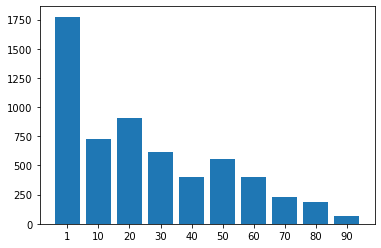

In [37]:
classes = np.unique(train_face_age['ClassId'],return_counts=True)

plt.bar(classes[0],classes[1])

## train, val 데이터 70대 이상 하나의 클래스로 합침

In [38]:
for i in range(len(train_face_age)):
    if int(train_face_age['ClassId'][i]) >= 70:
        train_face_age['ClassId'][i] ='70'

In [39]:
for i in range(len(val_face_age)):
    if int(val_face_age['ClassId'][i]) >= 70:
        val_face_age['ClassId'][i] ='70'

<BarContainer object of 8 artists>

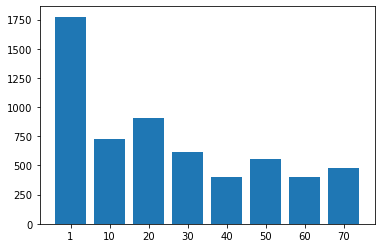

In [40]:
classes = np.unique(train_face_age['ClassId'],return_counts=True)

plt.bar(classes[0],classes[1])

In [41]:
dict_train_face_age = {}
for age,value in zip(classes[0],classes[1]):
    dict_train_face_age[age]=value
dict_train_face_age

{'1': 1775,
 '10': 728,
 '20': 905,
 '30': 617,
 '40': 398,
 '50': 556,
 '60': 402,
 '70': 482}

# 데이터 샘플링

In [42]:
dict_weight = {1000:None, 800:None, 500:1.8, None:2}
"""
dict_weight.keys()  : the number of images
dict_weight.values(): the result ratio
"""

'\ndict_weight.keys()  : the number of images\ndict_weight.values(): the result ratio\n'

In [43]:
keys   = list(dict_weight.keys())
values = list(dict_weight.values())


for age in dict_train_face_age.keys():
    if dict_train_face_age[age] > keys[0]:
#         print(f"[DEBUG] under_samplinng(x{values[0]})_class: {age}")
#         weight=int(dict_train_face_age[age]*(1-values[0]))
#         index=train_face_age[train_face_age['ClassId']==age].index[:weight]
#         train_face_age.drop(index,inplace=True)
        pass

    elif dict_train_face_age[age]>keys[1]: #no need to drop
#         weight=int(dict_train_face_age[age]*(1-values[1]))
#         print(f"[DEBUG] over_sampling(x{values[1]})_class: {age}")
#         index=train_face_age[train_face_age['ClassId']==age].index[:weight]
#         train_face_age=train_face_age.drop(index)
        pass

    elif dict_train_face_age[age]>keys[2]:
        weight=int(dict_train_face_age[age]*(values[2] -1))
        print(f"[DEBUG] over_sampling(x{values[2]})_class: {age}")
        index=train_face_age[train_face_age['ClassId']==age].index[:weight]
        train_face_age=train_face_age.append(train_face_age.loc[index],ignore_index=True)

    else:
        weight=values[3] # 정수만 넣으세요
        weight=int(weight-1) #?
        print(f"[DEBUG] over_sampling(x{values[3]})_class: {age}")
        A=train_face_age[train_face_age['ClassId']==age]
        index=train_face_age[train_face_age['ClassId']==age].index[:]
        index=(index.tolist())*weight
        train_face_age=train_face_age.append(train_face_age.loc[index],ignore_index=True)

[DEBUG] over_sampling(x1.8)_class: 10
[DEBUG] over_sampling(x1.8)_class: 30
[DEBUG] over_sampling(x2)_class: 40
[DEBUG] over_sampling(x1.8)_class: 50
[DEBUG] over_sampling(x2)_class: 60
[DEBUG] over_sampling(x2)_class: 70


<BarContainer object of 8 artists>

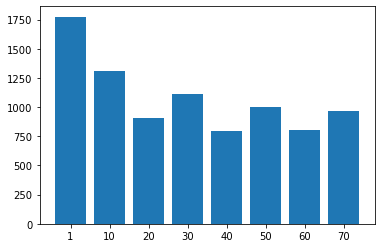

In [44]:
classes=np.unique(train_face_age['ClassId'],return_counts=True)

plt.bar(classes[0],classes[1])

In [45]:
dict_train_face_age = {}
for age,value in zip(classes[0],classes[1]):
    dict_train_face_age[age]=value
dict_train_face_age

{'1': 1775,
 '10': 1310,
 '20': 905,
 '30': 1110,
 '40': 796,
 '50': 1000,
 '60': 804,
 '70': 964}

In [46]:
train_face_age=sklearn.utils.shuffle(train_face_age)
train_face_age.shape

(8664, 2)

## 2. 데이터 전 처리

##### [assignment 1] train_datagen을 변경하여 학습해보기

train data와 validation data로 나눕니다. 이 과정에서 tensorflow.keras 패키지에서 제공하는 함수를 사용합니다. tf.keras.preprocessing.image.ImageDataGenerator는 기본적인 데이터 augmentation 기법을 제공합니다. 이미지 전처리 기법도 모델의 최종 성능을 높이는 좋은 방법입니다.

In [47]:
img_height = 128
img_width  = 128
batch_size = 32

In [48]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
#         vertical_flip=False,
#         zca_whitening=False,
#         rotation_range=20,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.1,
#         zoom_range=0.1
        )

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe   = train_face_age ,
        directory   = '.',
        x_col       = 'Path', 
        y_col       = 'ClassId',
        target_size = (img_height, img_width),
        batch_size  = batch_size,
        class_mode  = 'sparse')

val_generator = val_datagen.flow_from_dataframe(
        dataframe   = val_face_age,
        directory   = '.',
        x_col       = 'Path',
        y_col       = 'ClassId',
        target_size = (img_height, img_width),
        shuffle=False,
        batch_size  = batch_size,
        class_mode  = 'sparse')

Found 8664 validated image filenames belonging to 8 classes.
Found 1955 validated image filenames belonging to 8 classes.


In [49]:
data_classes = train_generator.class_indices
num_classes = len(data_classes)
print('class: {}'.format(data_classes))

class: {'1': 0, '10': 1, '20': 2, '30': 3, '40': 4, '50': 5, '60': 6, '70': 7}


In [50]:
for image_batch, labels_batch in train_generator:
    print(labels_batch)
    break

[6. 3. 0. 6. 0. 4. 3. 7. 0. 2. 6. 1. 7. 7. 0. 2. 2. 0. 1. 0. 7. 4. 6. 6.
 1. 2. 7. 5. 4. 3. 0. 6.]


In [51]:
for image_batch, labels_batch in val_generator:
    print(labels_batch)
    break

[0. 3. 7. 3. 0. 0. 7. 0. 7. 7. 1. 7. 5. 0. 1. 0. 1. 3. 0. 0. 0. 2. 5. 3.
 1. 5. 2. 0. 7. 5. 2. 3.]


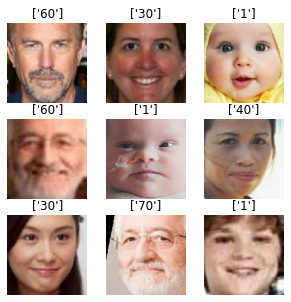

In [52]:
plt.figure(figsize=(5,5))
images, labels = train_generator[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    key = [key for key, value in data_classes.items() if value  == labels[i]]
    plt.title(key)
    plt.axis("off")

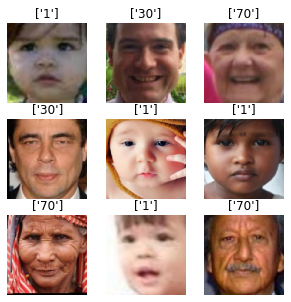

In [53]:
plt.figure(figsize=(5,5))
images, labels = val_generator[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    key = [key for key, value in data_classes.items() if value  == labels[i]]
    plt.title(key)
    plt.axis("off")

## 3. Convolutional Neural Network (CNN) 모델

model.summary()는 모델의 구성을 한 눈에 확인할 수 있게 도와줍니다.

##### [assignment 2] 모델 구조를 수정해보기

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))             

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.2))                      

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))                      
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 63, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)            

##### [assignment 3] optimizer 변경해보기

### https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [55]:
epochs = 100

opt = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

학습 과정을 시각화하여 확인합니다. 학습이 진행되면서 loss는 줄고, accuracy는 올라가는 것을 확인할 수 있습니다.

In [56]:
print(model.layers[0].get_weights()) #before training

[array([[[[ 0.065963  , -0.03698599, -0.0111414 , ...,  0.03216675,
          -0.02079079, -0.02175704],
         [ 0.07385786,  0.03721222,  0.02945654, ...,  0.06348875,
           0.01538762, -0.04258493],
         [-0.04052803,  0.09785298,  0.05444032, ..., -0.0646382 ,
           0.06231254,  0.07204928]],

        [[-0.07496236, -0.06615464, -0.03055099, ...,  0.07593559,
          -0.08893126, -0.05638887],
         [ 0.05828895, -0.00833347,  0.00307372, ..., -0.05961629,
           0.05403593, -0.07345144],
         [ 0.05097677,  0.07148673, -0.09176402, ..., -0.08180618,
           0.09662393, -0.00327896]],

        [[ 0.01093549,  0.02151905, -0.07195634, ...,  0.088616  ,
           0.04979785, -0.09192246],
         [-0.0479009 ,  0.01731776,  0.07375552, ...,  0.05352813,
           0.03048681, -0.04538386],
         [-0.05530027, -0.05054364,  0.02541229, ..., -0.06087363,
          -0.0370746 ,  0.0680234 ]]],


       [[[ 0.0980415 ,  0.09723157,  0.0021291 , ..., -

In [57]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
             tf.keras.callbacks.ModelCheckpoint(filepath='final_project_4.3_Model_Comparison_Model_2.h5', monitor='val_loss', save_best_only=True),
#             scheduler
            ]
history = model.fit(
    x               = train_generator,      
    validation_data = val_generator,
    epochs          = epochs,
    callbacks       = callbacks
)

Epoch 1/100
271/271 [==============================] - 181s 667ms/step - loss: 1.9179 - accuracy: 0.2546 - val_loss: 1.3936 - val_accuracy: 0.4772
Epoch 2/100
271/271 [==============================] - 181s 667ms/step - loss: 1.4894 - accuracy: 0.4102 - val_loss: 1.2425 - val_accuracy: 0.5115
Epoch 3/100
271/271 [==============================] - 181s 668ms/step - loss: 1.3416 - accuracy: 0.4697 - val_loss: 1.1615 - val_accuracy: 0.5269
Epoch 4/100
271/271 [==============================] - 182s 670ms/step - loss: 1.1994 - accuracy: 0.5161 - val_loss: 1.1186 - val_accuracy: 0.5432
Epoch 5/100
271/271 [==============================] - 181s 670ms/step - loss: 1.1223 - accuracy: 0.5490 - val_loss: 1.0634 - val_accuracy: 0.5775
Epoch 6/100
271/271 [==============================] - 182s 671ms/step - loss: 1.0553 - accuracy: 0.5755 - val_loss: 1.0466 - val_accuracy: 0.5826
Epoch 7/100
271/271 [==============================] - 182s 672ms/step - loss: 0.9723 - accuracy: 0.6175 - val_loss: 1

학습 과정을 시각화하여 확인합니다. 학습이 진행되면서 loss는 줄고, accuracy는 올라가는 것을 확인할 수 있습니다.

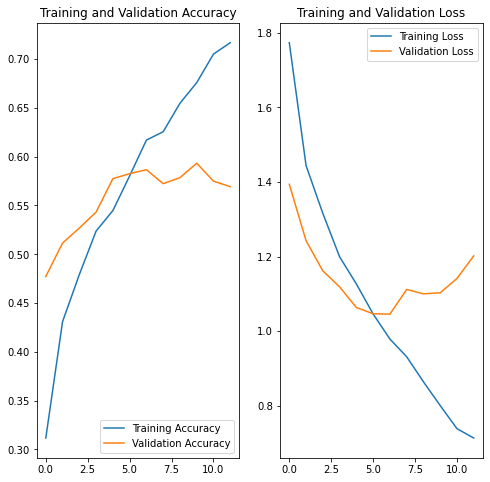

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range =  range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

학습 후 weight. 학습 전 weight와 비교하여 달라졌음을 볼 수 있습니다. 즉, CNN이 학습되는 과정은 수많은 weigt를 학습하면서 모델이 예측에 필요한 feature를 사용할 수 있는 방향으로 업데이트된다는 것을 의미합니다.

In [59]:
print(model.layers[0].get_weights())

[array([[[[ 0.04058157, -0.04072289, -0.03226535, ...,  0.04754898,
           0.00505772,  0.00658508],
         [ 0.06671818,  0.02801642,  0.02076436, ...,  0.05152575,
           0.05400534, -0.14879055],
         [-0.03836502,  0.08926076,  0.04016567, ..., -0.06567984,
           0.12511514,  0.01965803]],

        [[-0.11697689, -0.07990149, -0.07195038, ...,  0.07979638,
          -0.05530454, -0.02091961],
         [ 0.02916548, -0.02891162, -0.02389809, ..., -0.08362577,
           0.09909882, -0.16544774],
         [ 0.02674727,  0.05302047, -0.12703447, ..., -0.08537161,
           0.16759302, -0.04494997]],

        [[-0.02812129,  0.00760486, -0.12305524, ...,  0.07240642,
           0.0859412 , -0.06089026],
         [-0.0746384 , -0.00252479,  0.03689037, ..., -0.00333734,
           0.07383052, -0.14034575],
         [-0.07684599, -0.0682166 , -0.0196186 , ..., -0.09436839,
           0.03292543,  0.021349  ]]],


       [[[ 0.0767561 ,  0.09012214, -0.02171025, ..., -

학습 과정을 재설계하기 위하여 결과를 분석합니다. 아래의 그림은 Confusion Matrix로, 세로 줄은 실제 값을, 가로 줄은 예측 값을 나타냅니다.

In [60]:
val_generator.reset()
val_prediction = model.predict(val_generator)
prediction = np.argmax(val_prediction, axis = 1)

In [61]:
prediction

array([0, 3, 6, ..., 0, 2, 3])

<BarContainer object of 8 artists>

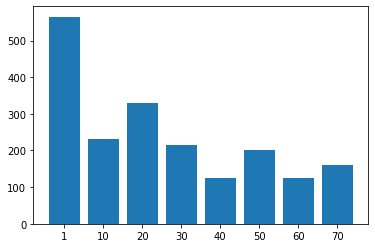

In [62]:
dict_val_face_age = {}

for age in ['1','10','20','30','40','50','60','70']:
    dict_val_face_age[age] = 0

for age in val_face_age['ClassId']:
    dict_val_face_age[age] += 1

plt.bar(dict_val_face_age.keys(), dict_val_face_age.values())

<AxesSubplot:>

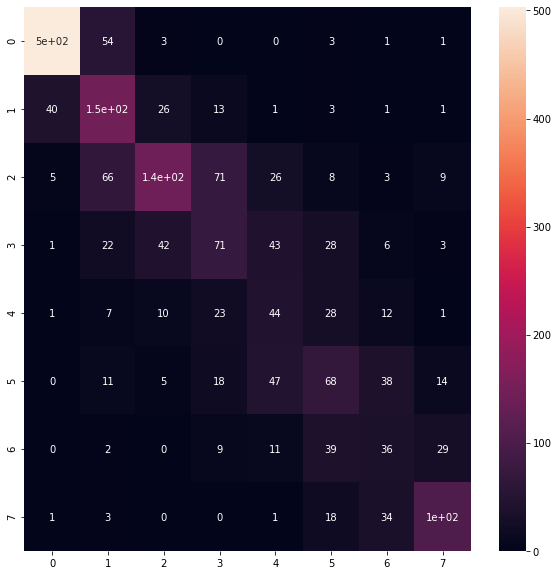

In [63]:
cm = confusion_matrix(val_generator.labels,prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [64]:
cm

array([[503,  54,   3,   0,   0,   3,   1,   1],
       [ 40, 146,  26,  13,   1,   3,   1,   1],
       [  5,  66, 142,  71,  26,   8,   3,   9],
       [  1,  22,  42,  71,  43,  28,   6,   3],
       [  1,   7,  10,  23,  44,  28,  12,   1],
       [  0,  11,   5,  18,  47,  68,  38,  14],
       [  0,   2,   0,   9,  11,  39,  36,  29],
       [  1,   3,   0,   0,   1,  18,  34, 103]])

In [65]:
from sklearn.metrics import classification_report
target_names = ['1','10','20','30','40','50','60','70']
print(classification_report(val_generator.labels, prediction, target_names=target_names))

              precision    recall  f1-score   support

           1       0.91      0.89      0.90       565
          10       0.47      0.63      0.54       231
          20       0.62      0.43      0.51       330
          30       0.35      0.33      0.34       216
          40       0.25      0.35      0.29       126
          50       0.35      0.34      0.34       201
          60       0.27      0.29      0.28       126
          70       0.64      0.64      0.64       160

    accuracy                           0.57      1955
   macro avg       0.48      0.49      0.48      1955
weighted avg       0.59      0.57      0.57      1955



In [66]:
# 다음에 테스트 할 상황이 생기면 사용하려고 학습된 모델 불러오는 코드 넣어놨습니다.
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
model = load_model('final_project_4.3_Model_Comparison_Model_2.h5')